In [12]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import cobra

In [13]:
#Cargar modelo y datos de interes
model = cobra.io.read_sbml_model("../recon3d_6rx.xml")
mat = scipy.io.loadmat('/home/bguzman/jupyter/UI/fba/supplementary_software_code.mat')
acetlevel=mat["acetlevellistval"] #acetlevellistval lista de valores de acetilacion

In [14]:
#Solo 12 lineas en las que se utiliza glucosa como fuente de carbono principal
A549= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/A549_LUNG_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
HCT116= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/HCT116_LARGE_INTESTINE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
HL60= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Solved_To_Acceptable_Level.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
MCF7= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/MCF7_BREAST_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
NB4= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/NB4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
PANC1= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/PANC1_PANCREAS_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
PC3= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/PC3_PROSTATE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
SAOS2= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/SAOS2_BONE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
U2OS= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/U2OS_BONE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
U251MG= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/U251MG_CENTRAL_NERVOUS_SYSTEM_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
U937= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/U937_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
HUH7= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/HUH7_LIVER_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()

In [15]:
#Agrupar en listas los archivos y nombres 
lista_csv=[A549,HCT116,HL60,HUH7,MCF7,NB4,PANC1,PC3,SAOS2,U251MG,U2OS,U937]
lista_line=["A549","HCT116","HL60","HUH7","MCF7","NB4","PANC1","PC3","SAOS2","U251MG","U2OS","U937"]

In [16]:
#listas para guardar los valores de los flujos para c/rx
lista_glc=[]
lista_gal=[]
lista_PAC=[]

def buscar_posicion(file_csv,name_reaction):

    for posicion,name in file_csv["Unnamed: 0"].items():
        if name== name_reaction :
            return (posicion)
    return ("Not found")

def buscar_valor(file_csv,name_reaction):
    posicion= buscar_posicion(file_csv,name_reaction)
    return file_csv["0"][posicion]

for name_csv in lista_csv:
    lista_PAC.append(buscar_valor(name_csv,"R_EX_PAC"))
    lista_glc.append(buscar_valor(name_csv,"R_EX_glc__D_e"))
    

print(lista_glc)

[0.13745475131598905, 0.17684545387653905, 0.18224816110825992, 0.13809289234485336, 0.20371135188064735, 0.1463925979677907, 0.10711428761859518, 0.13765945670659346, 0.14943933570157586, 0.13771840231019966, 0.10411631571745744, 0.1125510389670124]


In [17]:
#Valor total multiplicación EX_PAC*alfa_glc
norm=[]
for i in range(12):
    mult1=lista_PAC[i]
    alfa=1/lista_glc[i]
    
    
    norm.append(mult1*alfa)
print(norm)

[0.4296485387243704, 0.30845207884534137, 0.2611344396974556, 0.4679357897586447, 0.25304244741158566, 0.363938794783295, 0.6064947576264784, 0.44780614760962556, 0.42666499317551454, 0.45550945394606274, 0.4183590490408576, 0.505729092354124]


In [18]:
#lista que contiene acetlevel para las 12 lineas 
acetlevel=[0.00293056, 0.00201402, 0.00345657, 0.00400844, 0.00237375, 0.0020285 , 0.00952421, 0.00604044, 0.00565521, 0.00620858, 0.00445255, 0.00172606]


Coef. Pearson:
(0.6456717327658275, 0.023337746041355144)


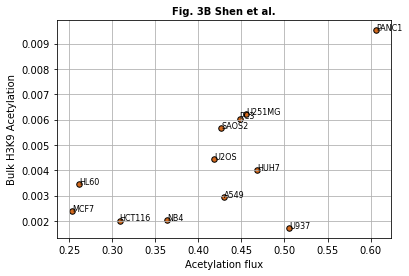

In [19]:
from scipy import stats
x=norm 
y=acetlevel
plt.scatter(x,y,color="chocolate",edgecolors='black',s=30)
plt.title('Fig. 3B Shen et al.',fontsize = 10,fontweight = "bold")
plt.xlabel('Acetylation flux')
plt.ylabel('Bulk H3K9 Acetylation')

r=stats.pearsonr(x, y)

print("Coef. Pearson:")
print(r)

for i in range(12):
    plt.text(x[i],y[i],lista_line[i],fontsize = 8)
    
plt.grid()
plt.show()
